In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

df = pd.read_csv('spam.csv')
df.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.value_counts()

Category  Message                                                                                                                                                
ham       Sorry, I'll call later                                                                                                                                     30
          I cant pick the phone right now. Pls send a message                                                                                                        12
          Ok...                                                                                                                                                      10
          Okie                                                                                                                                                        4
          7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear     

In [9]:
df[df['Category'] == 'spam'].value_counts()

Category  Message                                                                                                                                                           
spam      Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                   4
          #ERROR!                                                                                                                                                               3
          Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
          Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                            3
          December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for

In [10]:
df[df['Category'] == 'ham'].value_counts()

Category  Message                                                                                                                                 
ham       Sorry, I'll call later                                                                                                                      30
          I cant pick the phone right now. Pls send a message                                                                                         12
          Ok...                                                                                                                                       10
          Okie                                                                                                                                         4
          Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..     4
                                                                                        

In [11]:
label_encoder = LabelEncoder()

df['Spam'] = label_encoder.fit_transform(df['Category'])

print(df.head())

  Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0


In [12]:
df.drop('Category', inplace = True, axis =1)

In [13]:
X= df.Message
y= df['Spam'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

## Building the model

In [22]:
clf = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [23]:
nb  = clf.fit(X_train, y_train)

In [24]:
clf.score(X_train, y_train)

0.9932690150325331

In [25]:
clf.score(X_test, y_test)

0.9919282511210762

In [26]:
y_pred = clf.predict(X_test)

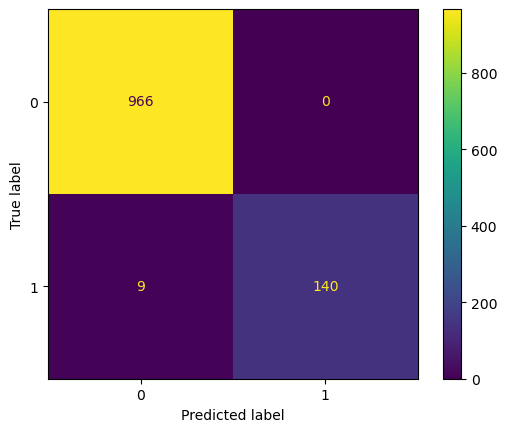

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
display_labels = nb.classes_)
disp.plot()

In [29]:
clf.predict(testing_emails)

array([0, 1])